In [1]:
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import LancasterStemmer

from PIL import Image
from collections import Counter

In [2]:
df = pd.read_csv('National Museum of Korea_tripadvisor.csv')
df

,Unnamed: 0,NAME,STAR,REVIEW,DATE
0,0,Learntorock,4.0,"A large, well organised museum that was worth ...","Written July 14, 2022"
1,1,lostinatlanta,3.0,"This place is massive, the first floor has ite...","Written July 13, 2022"
2,2,carina,3.0,This museum is well laid out and it is nice. T...,"Written June 26, 2022"
3,3,Gombung,4.0,very impressive! it shows the 5000 year old ko...,"Written June 21, 2022"
4,4,Traveltheorient,5.0,One of the most spectacular museums I have eve...,"Written June 11, 2022"
...,...,...,...,...,...
1295,1295,1Q,5.0,"Once you intended to visit this place, then yo...","Written May 26, 2012"
1296,1296,gipsy2,5.0,"An amazing building full of interesting facts,...","Written May 23, 2012"
1297,1297,darcforest,4.0,This place is huge and takes a long time to go...,"Written May 22, 2012"
1298,1298,GirlWithPearl,5.0,one or two days a week open until 21! Lot to s...,"Written May 18, 2012"


In [3]:
#불용어 추가
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
add_stop_words = ["'", ",", "'s", ":", ".", "?", "!","(",")","n't","korea","korean"]
for word in add_stop_words:
    stop_words.add(word)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jiu14\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:
text = df[['REVIEW']]
text

,REVIEW
0,"A large, well organised museum that was worth ..."
1,"This place is massive, the first floor has ite..."
2,This museum is well laid out and it is nice. T...
3,very impressive! it shows the 5000 year old ko...
4,One of the most spectacular museums I have eve...
...,...
1295,"Once you intended to visit this place, then yo..."
1296,"An amazing building full of interesting facts,..."
1297,This place is huge and takes a long time to go...
1298,one or two days a week open until 21! Lot to s...


In [5]:
from nltk.stem import WordNetLemmatizer
text = df[['REVIEW']]

text_arr=[[]for i in range(len(df['REVIEW']))]
#토큰화
text['REVIEW'] = text.apply(lambda row: nltk.word_tokenize(row['REVIEW']), axis=1)

#불용어 처리
text['REVIEW'] = text['REVIEW'].apply(lambda x: [word.lower() for word in x])
text['REVIEW'] = text['REVIEW'].apply(lambda x: [word for word in x if word not in (stop_words)])

#표제어 추출
text['REVIEW'] = text['REVIEW'].apply(lambda x : [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
    
#길이가 3이하인 단어에 대해서 제거하는 작업을 수행
tokenized_doc = text['REVIEW'].apply(lambda x : [word for word in x if len(word) > 3])
    
#tf-idf 행렬을 만들기 위해 역토큰화
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
text['REVIEW'] = detokenized_doc
    
text_arr=[]

for i in text['REVIEW']:
    i=i.split()
    text_arr.append(i)


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15508\41158203.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['REVIEW'] = text.apply(lambda row: nltk.word_tokenize(row['REVIEW']), axis=1)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15508\41158203.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text['REVIEW'] = text['REVIEW'].apply(lambda x: [word.lower() for word in x])
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_15508\41158203.py:10: SettingWithCopyWarning: 
A 

In [6]:
text_arr

[['large',
  'well',
  'organise',
  'museum',
  'worth',
  'visit',
  'intersting',
  'items',
  'though',
  'would',
  'bite',
  'much',
  'focus',
  'pottery',
  'another',
  'appointment',
  'half',
  'hours',
  'look',
  'round',
  'manage',
  'would',
  'though',
  'three',
  'hours',
  'would',
  'better',
  'free',
  'entry',
  'easy'],
 ['place',
  'massive',
  'first',
  'floor',
  'items',
  'relevant',
  'history',
  'upper',
  'floor',
  'mostly',
  'pottery',
  'young',
  'finish',
  'first',
  'floor',
  'bother',
  'upper',
  'floor',
  'unless',
  'art/pottery',
  'also',
  'children',
  'museum',
  'require',
  'reservations',
  'plan',
  'ahead',
  '.....',
  'museum',
  'locate',
  'near',
  'subway',
  'stop',
  'prepare',
  'walk',
  'quarter',
  'mile'],
 ['museum',
  'well',
  'nice',
  'billion',
  'ceramics',
  'display',
  'museum',
  'mostly',
  'ceramics'],
 ['impressive',
  'show',
  '5000',
  'year',
  'history',
  'various',
  'subject',
  'enough',
  't

In [7]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(text_arr).transform(text_arr)
df = pd.DataFrame(te_ary, columns=te.columns_)

In [8]:
df

,'children,'dragon,'finish,'free,'gallery,'lounge,'national,'resting,'tea,'unimpressive,...,yongsan,york,young,younger,zealand,zodiac,zone,zoom,zoroastrians,"₩10,000+"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1297,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1298,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)
df=pd.DataFrame(frequent_itemsets)
#association_rules(frequent_itemsets, metric="lift", min_threshold=1)
df['length']=df['itemsets'].apply(lambda x:len(x))
df = df[(df['length']==2)&(df['support']>=0.05)].sort_values(by='support',ascending=False)


In [10]:
df[:93]

,support,itemsets,length
197,0.287692,"(museum, history)",2
169,0.256923,"(museum, free)",2
252,0.255385,"(visit, museum)",2
145,0.168462,"(museum, exhibit)",2
255,0.163077,"(well, museum)",2
...,...,...,...
167,0.068462,"(interest, free)",2
165,0.067692,"(hours, free)",2
225,0.067692,"(museum, large)",2
264,0.067692,"(visit, spend)",2


In [11]:
G=nx.Graph()
edges=[]
for i in df['itemsets']:
    i=tuple(i)
    edges.append(i)
#print(edges)
#ar=(edges); G.add_edges_from(ar)
#print(edges)

G.add_edges_from(edges)
#print(type([('박물관','역사'),('박물관','방문')]))
#print(type(edges))
#nx.draw(G)

In [11]:
#association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [17]:
dgr=nx.degree_centrality(G)
btw=nx.betweenness_centrality(G)
cls=nx.closeness_centrality(G)
egv=nx.eigenvector_centrality(G)
pgr=nx.pagerank(G)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


In [19]:
import operator
sorted_dgr=sorted(dgr.items(),key=operator.itemgetter(1),reverse=True)
sorted_btw=sorted(btw.items(),key=operator.itemgetter(1),reverse=True)
sorted_cls=sorted(cls.items(),key=operator.itemgetter(1),reverse=True)
sorted_egv=sorted(egv.items(),key=operator.itemgetter(1),reverse=True)
sorted_pgr=sorted(pgr.items(),key=operator.itemgetter(1),reverse=True)

In [20]:
G=nx.Graph()

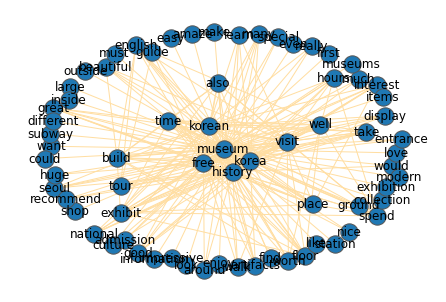

In [34]:
for i in range(len(sorted_pgr)):
    G.add_node(sorted_pgr[i][0],nodesize=sorted_dgr[i][1])
options={'edge_color':'#FFDEA2','width':1,'with_labels':True,'font_weight':'regular',}

nx.draw(G,pos=nx.spring_layout(G,k=3.5,iterations=100),**options)
ax=plt.gca()
ax.collections[0].set_edgecolor("#555555")
plt.show()

In [12]:
import scipy.stats
pr=nx.pagerank(G)
nsize=np.array([v for v in pr.values()])
nsize=2000*(nsize-min(nsize))/(max(nsize)-min(nsize))

C:\ProgramData\Anaconda3\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


In [13]:
pos = pos=nx.spring_layout(G)

findfont: Font family ['framd.ttf'] not found. Falling back to DejaVu Sans.


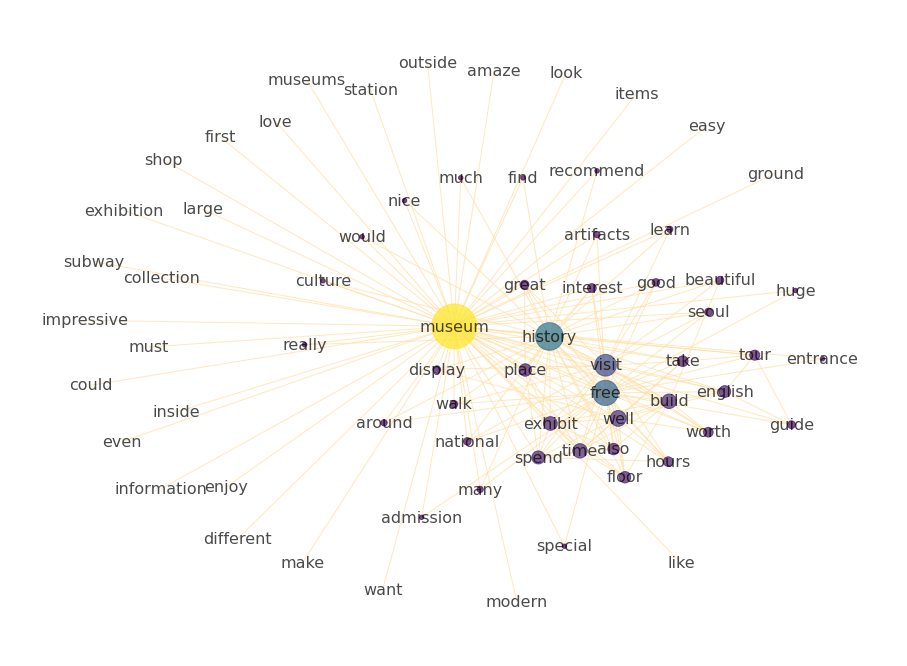

In [14]:
plt.figure(figsize=(16,12))
plt.axis('off')
nx.draw_networkx(G,font_family='framd.ttf',font_size=16,pos=pos,node_color=list(pr.values()),node_size=nsize,alpha=0.7,edge_color='#FFDEA2')
plt.savefig("network1.png")